# Assignment-13-KNN (K Nearest Neighbors) (Glass)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report

In [2]:
# Import Dataset
glass=pd.read_csv('Database/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
x=glass.iloc[:,0:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [7]:
y=glass.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=35)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((143, 9), (71, 9), (143,), (71,))

## Train the K-Neighbors Classifier without Hyper-parameter Tuning

In [10]:
k=np.sqrt(glass.shape[0]/2)
k

10.344080432788601

In [11]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)

In [12]:
model.score(x_train,y_train)

0.7762237762237763

In [13]:
y_pred=model.predict(x_test)
y_pred

array([2, 6, 3, 1, 1, 2, 2, 1, 1, 5, 2, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 7,
       5, 7, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 3, 7, 1, 2, 1, 1, 1, 3, 2, 1,
       2, 3, 6, 1, 1, 2, 1, 1, 1, 5, 2, 2, 5, 1, 3, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1], dtype=int64)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.72      0.68        25
           2       0.81      0.76      0.79        29
           3       0.29      0.50      0.36         4
           5       1.00      0.67      0.80         6
           6       1.00      0.67      0.80         3
           7       1.00      0.75      0.86         4

    accuracy                           0.72        71
   macro avg       0.79      0.68      0.71        71
weighted avg       0.76      0.72      0.73        71



## Train the K-Neighbors Classifier with Hyper-parameter Tuning

In [15]:
# Use GridsearchCV

In [16]:
knnc=KNeighborsClassifier()
param_grid=dict(n_neighbors=range(1,3))

In [17]:
model=GridSearchCV(knnc,param_grid,refit = True, verbose = 3)

In [18]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.586, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.724, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.724, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.714, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.571, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.690, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.643, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.536, total=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 3)}, verbose=3)

In [19]:
# print best parameter after tuning
print(model.best_params_)

{'n_neighbors': 1}


In [20]:
# print how our model looks after hyper-parameter tuning
print(model.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [21]:
model.score(x_train,y_train)

1.0

In [22]:
# Model Predictions using test data
y_pred = model.predict(x_test)
y_pred

array([2, 6, 1, 1, 1, 1, 2, 1, 1, 5, 2, 3, 1, 2, 1, 2, 3, 2, 1, 2, 1, 7,
       5, 7, 2, 1, 2, 1, 2, 2, 2, 2, 1, 5, 3, 7, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 6, 3, 1, 7, 3, 1, 1, 2, 2, 2, 5, 2, 3, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1], dtype=int64)

In [23]:
# print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.80      0.74        25
           2       0.85      0.76      0.80        29
           3       0.33      0.50      0.40         4
           5       1.00      0.67      0.80         6
           6       1.00      0.67      0.80         3
           7       0.75      0.75      0.75         4

    accuracy                           0.75        71
   macro avg       0.77      0.69      0.72        71
weighted avg       0.78      0.75      0.75        71



In [24]:
## Visualizing the CV results

In [25]:
# choose k between 1 to 10
k_range = range(1, 10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

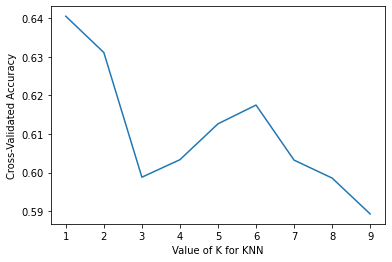

In [26]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

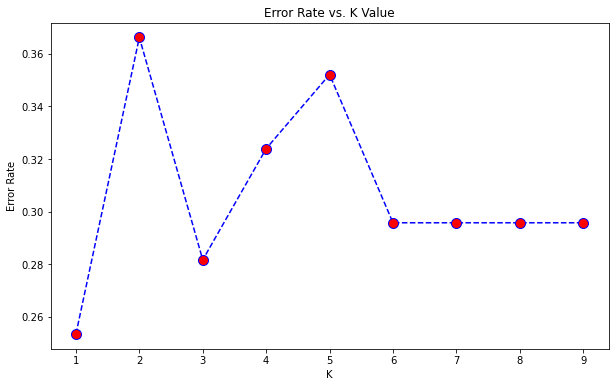

In [27]:
# plot Error Rate vs. K Value
plt.figure(figsize=(10,6))

error_rate = []
for i in range(1, 10):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.plot(range(1, 10), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')